In [1]:
import matplotlib.pyplot as plt
import  numpy as np
import  pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
import random
import tensorflow as tf
import warnings


from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import LearningCurveDisplay, learning_curve






warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="ticks")
sns.set_palette("viridis")

Random Forest Model Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     27995
           1       0.36      0.46      0.40      2005

    accuracy                           0.91     30000
   macro avg       0.66      0.70      0.68     30000
weighted avg       0.92      0.91      0.91     30000

[[26350  1645]
 [ 1091   914]]

Random Forest Metrics
Accuracy: 0.91
Precision: 0.36
Recall: 0.46
F1-Score: 0.40


In [5]:
y_train_resampled.value_counts()

0    111979
1    111979
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
from clarifai.client.model import Model
from clarifai.client.input import Inputs

prompt = "Imagine you are dealing with the Give Me Credit Dataset in Python. Build a hole ETL process, prepare its data and construct a efficient Machine Learning model with 2 different algorithm: SVM and other that you think can be helpful"
inference_params = dict(temperature=0.2, max_tokens=100, top_k=50, system_prompt="You're the helpful assistent")

model_prediction = Model("https://clarifai.com/anthropic/completion/models/claude-3-sonnet", pat='b79a01d879d64050ad594f53e4ec6bde').predict(inputs = [Inputs.get_multimodal_input(input_id="", raw_text=prompt)], inference_params=inference_params)
print(model_prediction.outputs[0].data.text.raw)


### Helper functions

In [89]:
df_data= pd.read_csv(os.path.join('..','data', 'cs-training.csv'))
def cleanData(df):
    '''
    This Returns
    '''
    df.rename(columns={"Unnamed: 0": "ID",
                            "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit", 
                            "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)

    df.dropna(inplace=True)
    df= df[df['age'] >=18 ]
    df= df[df['NumberOfTime30-59DaysPastDueNotWorse']<96  ]
    df= df[df['balance_divided_creditlimit']<=1]

    
    garbage_columns= ["ID","SeriousDlqin2yrs", "NumberOfTime30-59DaysPastDueNotWorse"]
    X_train, X_test, y_train, y_test = train_test_split( df.drop(garbage_columns, axis=1), df["SeriousDlqin2yrs"], test_size=0.2)
    return X_train, X_test, y_train, y_test
def overSampling(X, y):

    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    
    return X_resampled, y_resampled



def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()



def plot_learningCurve(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train)
    display = LearningCurveDisplay(train_sizes=train_sizes,
        train_scores=train_scores, test_scores=test_scores, score_name="Score")
    display.plot()
    plt.show()


def plot_confussion(Y, y_pred):
    confi = confusion_matrix(Y, y_pred)
    plt.figure(figsize=(10, 10))

    confi = (confi/confi.sum())*100
    print(confi)
    formatted_confi = np.vectorize(lambda x: f"{x:.2f}%")(confi)
    sns.heatmap(confi, annot=formatted_confi, fmt="", linewidths=.5, cmap='cividis', xticklabels=[ 'FN','TN'], yticklabels=['TP', 'FN'])
    

    plt.show()


In [90]:
X_train, X_test, y_train, y_test = cleanData(df_data)
########################################################
X_train, y_train = overSampling(X_train, y_train)
X_test, y_test= overSampling(X_test, y_test)

## 5.0 DATA PRE-PROCESSING

#### 5.1 -   Normalization

In [91]:

real_columns= X_train.columns
X_train= pd.DataFrame(StandardScaler().fit_transform(X_train), columns=real_columns)
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=real_columns)


In [92]:
X_train

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,-1.220045,0.284852,-0.060780,-0.179927,-0.676371,-0.340201,-0.846336,-0.326087,0.880001
1,-0.712105,0.140975,-0.060274,0.074235,-0.121362,-0.340201,0.729159,-0.326087,0.880001
2,-0.598190,-0.218718,-0.059506,-0.278077,0.433646,-0.340201,-0.058588,-0.326087,0.045859
3,-1.086780,2.371072,-0.059876,-0.333287,-0.491368,-0.340201,-0.058588,-0.326087,-0.788282
4,-1.170995,2.227194,-0.060493,-0.105237,-0.121362,-0.340201,-0.058588,-0.326087,-0.788282
...,...,...,...,...,...,...,...,...,...
176211,-1.056744,-0.074841,-0.059813,0.343650,2.653680,-0.340201,-0.058588,-0.326087,0.880001
176212,0.577860,-1.441675,-0.059791,-0.333287,-0.861373,-0.340201,-0.846336,-0.326087,2.548285
176213,1.428947,-1.585552,-0.060773,-0.001699,-1.601384,0.771425,-0.846336,1.396336,2.548285
176214,-1.214696,-1.297798,-0.059747,0.032786,0.063641,-0.340201,0.729159,-0.326087,-0.788282


## 6.0 - Model Training

In [ ]:
models_accuracy

,KNN,RForest,SVM,Neural Network


#### 6.1 -  KNN Classifier

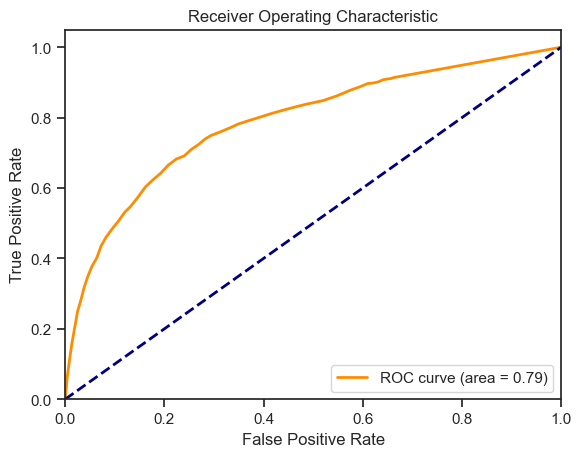

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     21996
           1       0.74      0.71      0.72     21996

    accuracy                           0.73     43992
   macro avg       0.73      0.73      0.73     43992
weighted avg       0.73      0.73      0.73     43992



In [93]:
models_accuracy = pd.DataFrame(columns=['KNN', 'RForest', 'SVM', 'Neural Network' ])
knn = KNeighborsClassifier(n_neighbors=50).fit(X_train, y_train)
y_knn_n = knn.predict(X_test)
accuracy_knn = (accuracy_score(y_test, y_knn_n))*100

y_prob_knn = knn.predict_proba(X_test)[:, 1]

plot_roc(y_test, y_prob_knn)
print(classification_report(y_test, y_knn_n))



#### 6.2 -  Random Florest Classifier

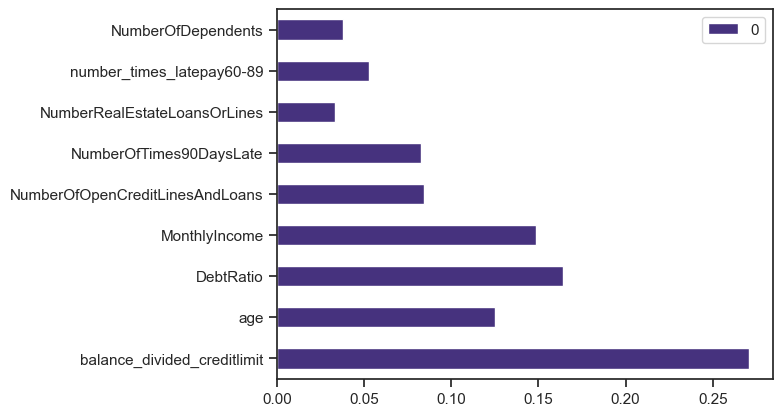

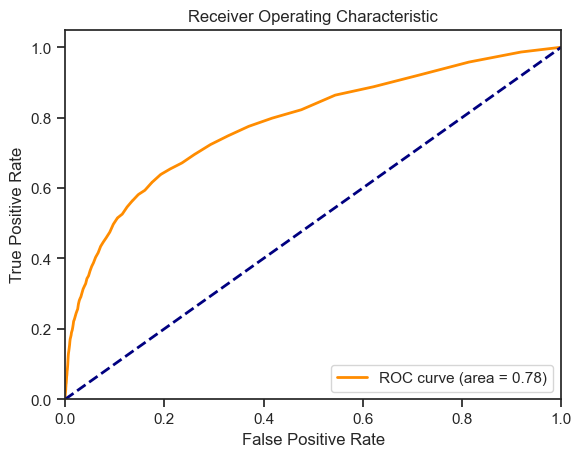

[[21682   314]
 [17681  4315]]
              precision    recall  f1-score   support

           0       0.55      0.99      0.71     21996
           1       0.93      0.20      0.32     21996

    accuracy                           0.59     43992
   macro avg       0.74      0.59      0.52     43992
weighted avg       0.74      0.59      0.52     43992



In [94]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
y_RFC= forest.predict(X_test)
accuracy_RFC= (accuracy_score(y_test, y_RFC))*100

#Feature importance
importance = forest.feature_importances_
global_importances = pd.DataFrame(importance, index=X_train.columns)

#ROC GRAPH
y_pred_prob = forest.predict_proba(X_test)[:, 1]

global_importances.plot.barh()
plot_roc(y_test, y_pred_prob)

print(confusion_matrix(y_test, y_RFC))
print(classification_report(y_test, y_RFC))
plt.show()

#### 6.3 - SVM

[[38.62975086 14.60038189]
 [11.37024914 35.39961811]]


c:\Users\Erika Magalhães\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


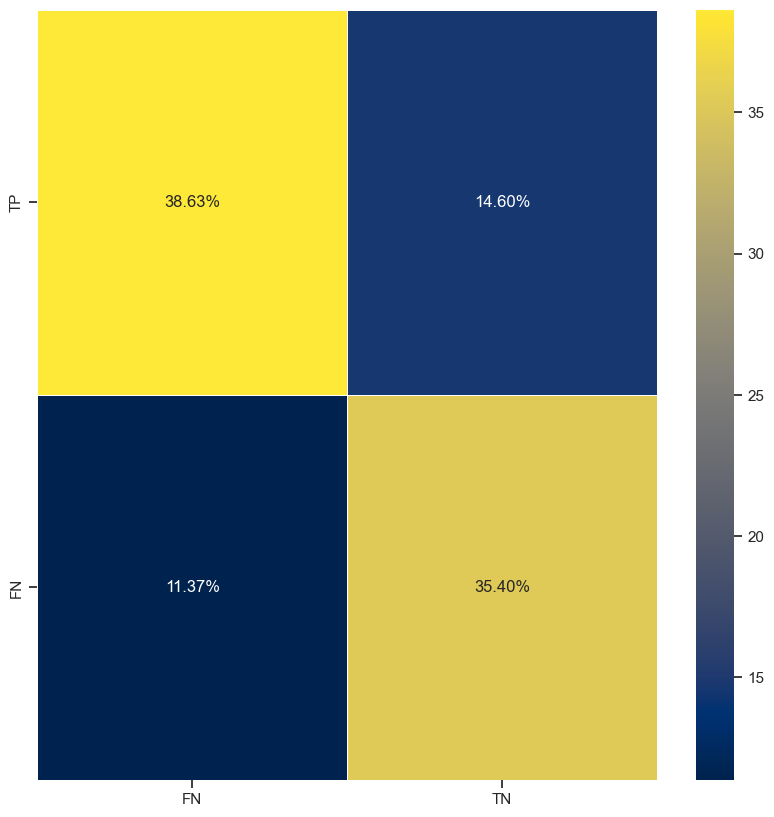

'              precision    recall  f1-score   support\n\n           0       0.73      0.77      0.75     21996\n           1       0.76      0.71      0.73     21996\n\n    accuracy                           0.74     43992\n   macro avg       0.74      0.74      0.74     43992\nweighted avg       0.74      0.74      0.74     43992\n'

In [95]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=0)  
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)




plot_confussion(y_pred, y_test)
cm_rf= classification_report(y_test, y_pred)
accuracy_SVM= (accuracy_score(y_pred, y_test))*100
cm_rf

### Description
- Support Vector Machines (SVM)

#### 6.5 -  Neural networks

In [96]:
model =tf.keras.Sequential(
[tf.keras.layers.Input(shape=(9,)),
 tf.keras.layers.Dense(units=50, activation='relu', ),
 tf.keras.layers.Dense(units=100, activation='relu', ),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(units=50, activation='relu', kernel_regularizer='l1' ),
 tf.keras.layers.Dense(units=1, activation='sigmoid', )
]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=[tf.keras.metrics.BinaryAccuracy()])
model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
5507/5507 [==============================] - 18s 3ms/step - loss: 0.6098 - binary_accuracy: 0.7457
Epoch 2/5
5507/5507 [==============================] - 17s 3ms/step - loss: 0.5910 - binary_accuracy: 0.7467
Epoch 3/5
5507/5507 [==============================] - 17s 3ms/step - loss: 0.5891 - binary_accuracy: 0.7464
Epoch 4/5
5507/5507 [==============================] - 17s 3ms/step - loss: 0.5865 - binary_accuracy: 0.7486
Epoch 5/5
5507/5507 [==============================] - 17s 3ms/step - loss: 0.5854 - binary_accuracy: 0.7490


In [97]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 50)                500       
                                                                 
 dense_65 (Dense)            (None, 100)               5100      
                                                                 
 dropout_16 (Dropout)        (None, 100)               0         
                                                                 
 dense_66 (Dense)            (None, 50)                5050      
                                                                 
 dense_67 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10701 (41.80 KB)
Trainable params: 10701 (41.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
y_nn=model.predict(X_test)
y_pred = (y_nn >= 0.6).astype(int)
acc_NN= (accuracy_score(y_pred, y_test ))*100
print(f"Model Accuracy: {acc_NN}")

1375/1375 [==============================] - 3s 2ms/step
Model Accuracy: 73.77023095108201


In [100]:
models_accuracy.loc[0]= {'KNN':f'{accuracy_knn:.2f}%', 'RForest': f'{accuracy_RFC:.2f}%', 'SVM': f'{accuracy_SVM:.2f}%', 'Neural Network': f'{acc_NN:.2f}%'}

In [101]:
models_accuracy

,KNN,RForest,SVM,Neural Network
0,72.77%,59.09%,74.03%,73.77%


In [ ]:
def app(value):
    if value.argmax() == 0:
        return 0
    elif value.argmax() == 1:
        return 1
listest= []
for i in yhat_knn_new:

    listest.append(app(i))

acc_teste= np.array(listest)

#### 5.1 - Changing data type

In [ ]:
columns_type= ['NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'number_times_latepay60-89',
       'NumberOfDependents']

X_train[columns_type] = X_train[columns_type].astype(np.int16)
y_train = y_train.astype(np.int8)
X_train['age'] = X_train['age'].astype(np.int8)


X_test[columns_type] = X_test[columns_type].astype(np.int16)
y_test = y_test.astype(np.int8)
X_test['age'] = X_test['age'].astype(np.int8)
pd.DataFrame(X_train.dtypes)


# Note we are reducing the bits usage of the features looking for a better perfomance. Some features as 'Age' doesn't need any bigger type than int8


,0
balance_divided_creditlimit,float64
age,int8
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int16
NumberOfTimes90DaysLate,int16
NumberRealEstateLoansOrLines,int16
number_times_latepay60-89,int16
NumberOfDependents,int16


#### 5.2 -   Normalization

In [ ]:

real_columns= X_train.columns
X_train= pd.DataFrame(normalize(X_train), columns=real_columns)
X_test = pd.DataFrame(normalize(X_test), columns=real_columns)
X_test

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,1.513451e-08,0.002360,0.000005,0.999997,0.000640,0.000000,0.000080,0.0,0.000000
1,0.000000e+00,0.003091,0.000015,0.999995,0.000412,0.000000,0.000069,0.0,0.000069
2,3.074909e-04,0.020240,0.000166,0.999793,0.001687,0.000000,0.000422,0.0,0.000843
3,0.000000e+00,0.004397,0.000017,0.999990,0.000684,0.000000,0.000098,0.0,0.000098
4,4.757110e-06,0.008705,0.000044,0.999961,0.001596,0.000000,0.000145,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
44837,2.686495e-04,0.018330,0.000139,0.999819,0.004999,0.000000,0.000000,0.0,0.000000
44838,5.516826e-04,0.026481,0.000011,0.999649,0.000000,0.000552,0.000000,0.0,0.000000
44839,7.402333e-06,0.002917,0.000028,0.999995,0.000750,0.000000,0.000083,0.0,0.000000
44840,2.802414e-04,0.014012,0.000100,0.999901,0.000560,0.000280,0.000280,0.0,0.000560
